# Filtered Data Creation #

Pre-requisites to running this file
- Run the string_processing.py file to preprocess the STRING database. Save this to STRING_full_filtered.tsv in the data_processed directory
- Run the preprocessing.ipynb

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
import pandas as pd

from preprocessing_files.preprocess_data import *
from preprocessing_files.create_training_data import *

# import everything needed

Preprocess NCI ALMANAC data

In [2]:
almcomb_combo_df, almcomb_pg_df, almanac_cl_name_to_id = get_drug_data()
almanac_cell_lines = set(almanac_cl_name_to_id.keys())
print("Number of unique cell lines: " + str(len(almanac_cl_name_to_id.keys())))
print("ID for cell line ACHN should be 3: " + str(almanac_cl_name_to_id["ACHN"]))

Number of unique cell lines: 60
ID for cell line ACHN should be 3: 3


Test drug_nsc_to_name fetching

In [3]:
drug_nsc_to_name = get_nsc_to_drug_name_dict()
print("Drug NSC to name dict:")
for key in list(drug_nsc_to_name.keys())[:5]:
    print(key, drug_nsc_to_name[key])

Drug NSC to name dict:
740 Methotrexate
750 Busulfan
752 Thioguanine/6-Thioguanine
755 Mercaptopurine
762 Mechlorethamine hydrochloride


get_smiles_and_fingerprints test

In [4]:
nsc_to_morgan_fingerprints = get_smiles_and_fingerprints(fp_len=256)
print(nsc_to_morgan_fingerprints)

{'740': array([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0.

[20:21:04] DEPRECATION WARNING: please use MorganGenerator
[20:21:04] DEPRECATION WARNING: please use MorganGenerator
[20:21:04] DEPRECATION WARNING: please use MorganGenerator
[20:21:04] DEPRECATION WARNING: please use MorganGenerator
[20:21:04] DEPRECATION WARNING: please use MorganGenerator
[20:21:04] DEPRECATION WARNING: please use MorganGenerator
[20:21:04] DEPRECATION WARNING: please use MorganGenerator
[20:21:04] DEPRECATION WARNING: please use MorganGenerator
[20:21:04] DEPRECATION WARNING: please use MorganGenerator
[20:21:04] DEPRECATION WARNING: please use MorganGenerator
[20:21:04] DEPRECATION WARNING: please use MorganGenerator
[20:21:04] DEPRECATION WARNING: please use MorganGenerator
[20:21:04] DEPRECATION WARNING: please use MorganGenerator
[20:21:04] DEPRECATION WARNING: please use MorganGenerator
[20:21:04] DEPRECATION WARNING: please use MorganGenerator
[20:21:04] DEPRECATION WARNING: please use MorganGenerator
[20:21:04] DEPRECATION WARNING: please use MorganGenerat

Test get_physicochemical_properties

In [5]:
nsc_to_properties = get_physicochemical_properties()
print(nsc_to_properties)

Is 66847 in drug_nsc_to_name? True
Is 66847 in sdf_names? True
Number of NSCs in NCI ALMANAC but not in SDF file: 2
{'119875', '753082'}
Number of molecules in SDF file but not in NCI ALMANAC: 0
{'740': {'MolWt': 454.44700000000023, 'TPSA': 210.53999999999996, 'LogP': 0.26840000000000125, 'NumAliphaticRings': 0, 'NumAromaticRings': 3, 'NumHDonors': 5, 'NumHAcceptors': 10}, '750': {'MolWt': 246.30599999999998, 'TPSA': 86.74000000000001, 'LogP': -0.2809999999999997, 'NumAliphaticRings': 0, 'NumAromaticRings': 0, 'NumHDonors': 0, 'NumHAcceptors': 6}, '752': {'MolWt': 167.197, 'TPSA': 83.38, 'LogP': 0.5976899999999999, 'NumAliphaticRings': 0, 'NumAromaticRings': 2, 'NumHDonors': 3, 'NumHAcceptors': 4}, '755': {'MolWt': 152.18200000000002, 'TPSA': 57.36, 'LogP': 1.0154899999999998, 'NumAliphaticRings': 0, 'NumAromaticRings': 2, 'NumHDonors': 2, 'NumHAcceptors': 3}, '762': {'MolWt': 192.51700000000002, 'TPSA': 3.24, 'LogP': 1.8176, 'NumAliphaticRings': 0, 'NumAromaticRings': 0, 'NumHDonors':

[20:21:04] Explicit valence for atom # 0 Cl, 2, is greater than permitted
[20:21:04] ERROR: Could not sanitize molecule ending on line 6200
[20:21:04] ERROR: Explicit valence for atom # 0 Cl, 2, is greater than permitted


In [6]:
nsc_to_prop_df = pd.read_csv("data_processed/almanac_nsc_to_properties.tsv", sep='\t', index_col=0)
nsc_to_prop_df

,Name,MolWt,TPSA,LogP,NumAliphaticRings,NumAromaticRings,NumHDonors,NumHAcceptors
NSC,,,,,,,,
740,Methotrexate,454.447,210.54,0.26840,0,3,5,10
750,Busulfan,246.306,86.74,-0.28100,0,0,0,6
752,Thioguanine/6-Thioguanine,167.197,83.38,0.59769,0,2,3,4
755,Mercaptopurine,152.182,57.36,1.01549,0,2,2,3
762,Mechlorethamine hydrochloride,192.517,3.24,1.81760,0,0,0,1
...,...,...,...,...,...,...,...,...
757441,Axitinib,386.480,70.67,4.63910,0,4,2,4
760766,Vandetanib,475.362,59.51,5.00420,1,3,1,6
761431,vemurafenib,489.931,91.92,5.54420,0,4,2,4


Preprocess DNA dataset

In [7]:
# preprocess_dna_data() # Uncomment if you haven't run this as part of preprocessing.ipynb
dna_cl_names, dna_identifier_to_entrez, dna_cl_to_exome_mut = get_dna_data()
print("Number of unique cell lines: " + str(len(dna_cl_names)))
print("Number of DNA identifiers: " + str(len(dna_identifier_to_entrez.keys())))
print("Shape of DNA mutation matrix: " + str(dna_cl_to_exome_mut.shape))

# Which cell lines are in the NCI-ALMANAC dataset but not in the DNA dataset?
print("Cell lines in NCI-ALMANAC but not in DNA:")
print(almanac_cell_lines - dna_cl_names)

# Which cell lines are in the DNA dataset but not in the NCI-ALMANAC dataset?
print("Cell lines in DNA but not in NCI-ALMANAC:")
print(dna_cl_names - almanac_cell_lines)

# Which cell lines are in dataset intersection?
print("Cell lines in intersection:")
print(almanac_cell_lines.intersection(dna_cl_names))


Number of unique cell lines: 59
Number of DNA identifiers: 138892
Shape of DNA mutation matrix: (60, 138893)
Cell lines in NCI-ALMANAC but not in DNA:
{'MDA-MB-468', 'MCF7'}
Cell lines in DNA but not in NCI-ALMANAC:
{'MDA-N'}
Cell lines in intersection:
{'HOP-62', 'IGROV1', 'HS 578T', 'T-47D', 'SF-268', 'ACHN', 'OVCAR-8', 'MDA-MB-231/ATCC', 'UACC-257', 'HCT-116', 'BT-549', 'MALME-3M', 'KM12', 'HCT-15', 'SF-295', 'CAKI-1', 'COLO 205', 'OVCAR-4', 'CCRF-CEM', 'HCC-2998', 'SK-MEL-28', 'SNB-75', '786-0', 'LOX IMVI', 'PC-3', 'NCI-H522', 'SK-OV-3', 'NCI-H322M', 'SNB-19', 'OVCAR-3', 'OVCAR-5', 'RXF 393', 'M14', 'MOLT-4', 'DU-145', 'HL-60(TB)', 'SW-620', 'A498', 'SK-MEL-5', 'SR', 'K-562', 'U251', 'SF-539', 'RPMI-8226', 'SK-MEL-2', 'NCI/ADR-RES', 'A549/ATCC', 'TK-10', 'NCI-H460', 'SN12C', 'HT29', 'MDA-MB-435', 'NCI-H226', 'UO-31', 'HOP-92', 'EKVX', 'NCI-H23', 'UACC-62'}


Preprocess RNA data

In [8]:
# preprocess_rna_data() # Uncomment if you haven't run this as part of preprocessing.ipynb
rna_cl_names, rna_entrez_to_gene_name, rna_cl_to_expr = get_rna_data()
print("Number of unique cell lines: " + str(len(rna_cl_names)))
print("Number of RNA entrez IDs: " + str(len(rna_entrez_to_gene_name.keys())))
print("Shape of RNA expression matrix: " + str(rna_cl_to_expr.shape))

# Which cell lines are in the NCI-ALMANAC dataset but not in the DNA dataset?
print("Cell lines in NCI-ALMANAC but not in RNA:")
print(almanac_cell_lines - rna_cl_names)

# Which cell lines are in the DNA dataset but not in the NCI-ALMANAC dataset?
print("Cell lines in RNA but not in NCI-ALMANAC:")
print(rna_cl_names - almanac_cell_lines)

# Which cell lines are in dataset intersection?
print("Cell lines in intersection:")
print(almanac_cell_lines.intersection(rna_cl_names))

Number of unique cell lines: 60
Number of RNA entrez IDs: 26178
Shape of RNA expression matrix: (60, 26179)
Cell lines in NCI-ALMANAC but not in RNA:
{'MDA-MB-468'}
Cell lines in RNA but not in NCI-ALMANAC:
{'MDA-N'}
Cell lines in intersection:
{'HOP-62', 'IGROV1', 'HS 578T', 'T-47D', 'SF-268', 'ACHN', 'OVCAR-8', 'MDA-MB-231/ATCC', 'UACC-257', 'HCT-116', 'BT-549', 'MALME-3M', 'KM12', 'HCT-15', 'SF-295', 'CAKI-1', 'COLO 205', 'OVCAR-4', 'CCRF-CEM', 'HCC-2998', 'SK-MEL-28', 'SNB-75', '786-0', 'LOX IMVI', 'PC-3', 'NCI-H522', 'SK-OV-3', 'NCI-H322M', 'SNB-19', 'OVCAR-3', 'OVCAR-5', 'RXF 393', 'M14', 'MOLT-4', 'DU-145', 'HL-60(TB)', 'MCF7', 'SW-620', 'A498', 'SK-MEL-5', 'SR', 'K-562', 'U251', 'SF-539', 'RPMI-8226', 'SK-MEL-2', 'NCI/ADR-RES', 'A549/ATCC', 'TK-10', 'NCI-H460', 'SN12C', 'HT29', 'MDA-MB-435', 'NCI-H226', 'UO-31', 'HOP-92', 'EKVX', 'NCI-H23', 'UACC-62'}


Preprocess protein data

In [9]:
# preprocess_protein_data() # Uncomment if you haven't run this as part of preprocessing.ipynb
protein_cl_names, protein_identifier_to_entrez, protein_cl_to_expr = get_protein_data()
print("Number of unique cell lines: " + str(len(protein_cl_names)))
print("Number of protein identifiers: " + str(len(protein_identifier_to_entrez.keys())))
print("Shape of protein matrix: " + str(protein_cl_to_expr.shape))

# Which cell lines are in the NCI-ALMANAC dataset but not in the protein dataset?
print("Cell lines in NCI-ALMANAC but not in protein:")
print(almanac_cell_lines - protein_cl_names)

# Which cell lines are in the protein dataset but not in the NCI-ALMANAC dataset?
print("Cell lines in protein but not in NCI-ALMANAC:")
print(protein_cl_names - almanac_cell_lines)

# Which cell lines are in dataset intersection?
print("Cell lines in intersection:")
print(almanac_cell_lines.intersection(protein_cl_names))

Number of unique cell lines: 59
Number of protein identifiers: 3167
Shape of protein matrix: (59, 3168)
Cell lines in NCI-ALMANAC but not in protein:
{'MDA-MB-468'}
Cell lines in protein but not in NCI-ALMANAC:
set()
Cell lines in intersection:
{'HOP-62', 'IGROV1', 'HS 578T', 'T-47D', 'SF-268', 'ACHN', 'OVCAR-8', 'MDA-MB-231/ATCC', 'UACC-257', 'HCT-116', 'BT-549', 'MALME-3M', 'KM12', 'HCT-15', 'SF-295', 'CAKI-1', 'COLO 205', 'OVCAR-4', 'CCRF-CEM', 'HCC-2998', 'SK-MEL-28', 'SNB-75', '786-0', 'LOX IMVI', 'PC-3', 'NCI-H522', 'SK-OV-3', 'NCI-H322M', 'SNB-19', 'OVCAR-3', 'OVCAR-5', 'RXF 393', 'M14', 'MOLT-4', 'DU-145', 'HL-60(TB)', 'MCF7', 'SW-620', 'A498', 'SK-MEL-5', 'SR', 'K-562', 'U251', 'SF-539', 'RPMI-8226', 'SK-MEL-2', 'NCI/ADR-RES', 'A549/ATCC', 'TK-10', 'NCI-H460', 'SN12C', 'HT29', 'MDA-MB-435', 'NCI-H226', 'UO-31', 'HOP-92', 'EKVX', 'NCI-H23', 'UACC-62'}


Get the intersection of cell lines for all data modalities

In [10]:
filtered_almcomb_combo_df, filtered_almcomb_pg_df, filtered_dna, filtered_rna, filtered_protein, filtered_string, intersection_entrez_ids = get_filtered_data()

Number of cell lines in intersection: 58
Original shape: (311466, 7) Filtered shape: (269460, 7)
Original shape: (60, 138893) Filtered shape: (58, 138893)
DNA NANs: False
Original shape: (60, 26179) Filtered shape: (58, 18212)
RNA NANs: False
Original shape: (59, 3168) Filtered shape: (58, 3168)
Protein NANs: False
Number of DNA entrez ids: 15664
Number of RNA entrez ids: 18211
Number of protein entrez ids: 3162
Number of string entrez ids: 18421
Number of entrez ids in intersection: 2665
Original shape: (58, 138893) Filtered shape: (58, 23373)
Original shape: (58, 18212) Filtered shape: (58, 2666)
Original shape: (58, 3168) Filtered shape: (58, 2669)
Original dataframe shape: (5171250, 5)
Protein subnetwork shape: (2173272, 5)


Answer some questions about the drug data:

In [11]:
# How many drug-pairs remain after all the preprocessing?
print("ALMANAC Concentrations, Number of Unique Drug Pairs: ", len(filtered_almcomb_pg_df[['NSC1', 'NSC2']].drop_duplicates()))
print("ALMANAC ComboScores, Number of Unique Drug Pairs: ", len(filtered_almcomb_combo_df[['NSC1', 'NSC2']].drop_duplicates()))

# How many triples (NSC1, NSC2, CELLNAME) remain after all the preprocessing?
print("ALMANAC Concentrations, Number of Unique Triplicates: ", len(filtered_almcomb_pg_df[['NSC1', 'NSC2', 'CELLNAME']].drop_duplicates()))
print("ALMANAC ComboScores, Number of Unique Triplicates: ", len(filtered_almcomb_combo_df[['NSC1', 'NSC2', 'CELLNAME']].drop_duplicates()))

# How many triples (NSC1, NSC2, CELLNAME) agree on synergistic/additive/antagonistic?
synergy_zip = filtered_almcomb_combo_df['ZIP'].apply(lambda x: 'synergistic' if x > 0 else ('antagonistic' if x < 0 else 'additive'))
synergy_hsa = filtered_almcomb_combo_df['HSA'].apply(lambda x: 'synergistic' if x > 0 else ('antagonistic' if x < 0 else 'additive'))
synergy_comboscore = filtered_almcomb_combo_df['COMBOSCORE'].apply(lambda x: 'synergistic' if x > 0 else ('antagonistic' if x < 0 else 'additive'))
agreed_categories = pd.DataFrame({
    'synergy_zip': synergy_zip,
    'synergy_hsa': synergy_hsa,
    'synergy_comboscore': synergy_comboscore
})
agreed_categories['agreed'] = agreed_categories.apply(
    lambda row: 1 if row['synergy_zip'] == row['synergy_hsa'] == row['synergy_comboscore'] else 0,
    axis=1
)
agreed_count = agreed_categories['agreed'].sum()
disagreed_count = len(agreed_categories) - agreed_count
print("Number of triples that agree on synergistic/additive/antagonistic: ", agreed_count)
print("Number of triples that disagree on synergistic/additive/antagonistic: ", disagreed_count)

ALMANAC Concentrations, Number of Unique Drug Pairs:  5355
ALMANAC ComboScores, Number of Unique Drug Pairs:  5355
ALMANAC Concentrations, Number of Unique Triplicates:  269460
ALMANAC ComboScores, Number of Unique Triplicates:  269460
Number of triples that agree on synergistic/additive/antagonistic:  125076
Number of triples that disagree on synergistic/additive/antagonistic:  144384


Mean count of cell lines: 5181.923076923077
Median count of cell lines: 5234.5
Standard deviation of cell lines: 254.8775058462895
Top 5 cell lines with the highest frequency:
CELLNAME
SW-620         5312
ACHN           5312
OVCAR-5        5307
NCI/ADR-RES    5306
HCT-15         5304
Name: count, dtype: int64
Top 5 cell lines with the lowest frequency:
CELLNAME
RPMI-8226    5072
SNB-75       5062
LOX IMVI     5033
HL-60(TB)    4933
SK-MEL-2     3479
Name: count, dtype: int64


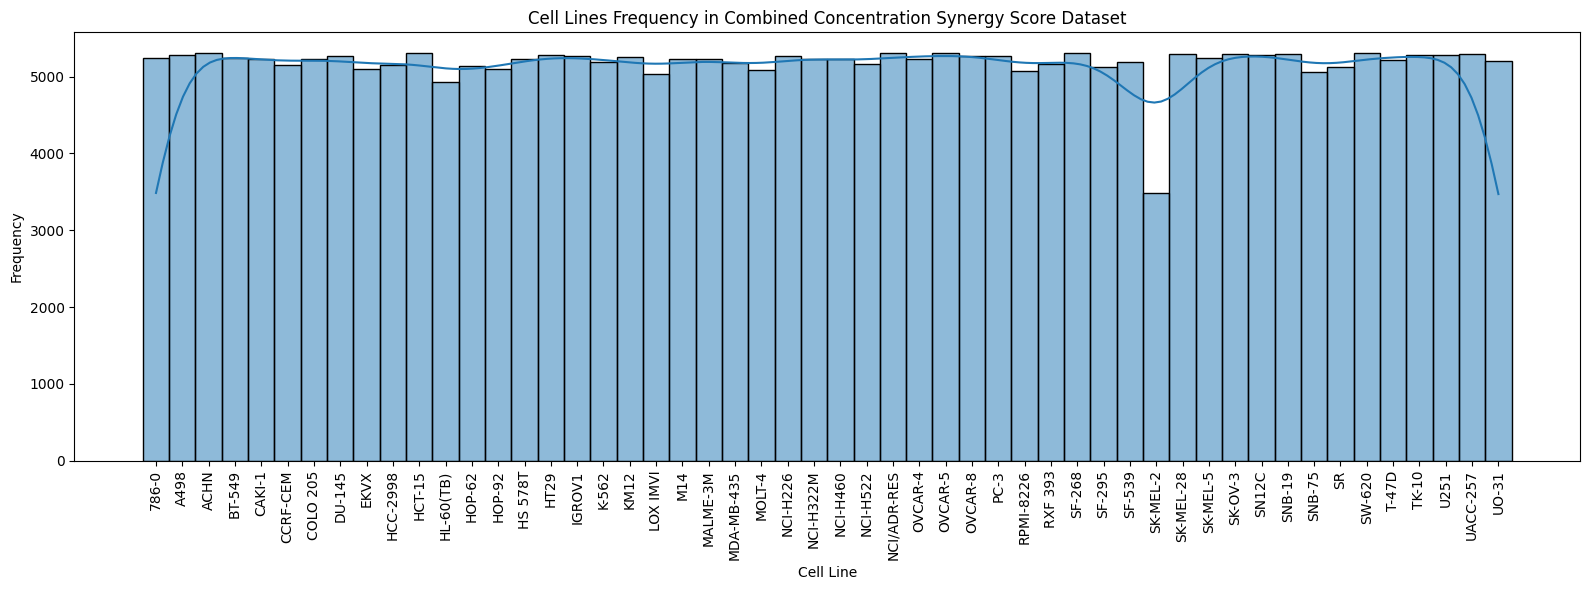

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Cell Lines frequency in the filtered_almcomb_combo_df
plt.figure(figsize=(16, 6))
sns.histplot(filtered_almcomb_combo_df['CELLNAME'], bins=30, kde=True)
plt.title('Cell Lines Frequency in Combined Concentration Synergy Score Dataset')
plt.xlabel('Cell Line')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('figures/supplemental_cell_line_histogram_combinedconc.png')

# Print the mean, median, and standard deviation of the frequency of cell lines
cell_line_counts = filtered_almcomb_combo_df['CELLNAME'].value_counts()
mean_count = cell_line_counts.mean()
median_count = cell_line_counts.median()
std_count = cell_line_counts.std()
print(f'Mean count of cell lines: {mean_count}')
print(f'Median count of cell lines: {median_count}')
print(f'Standard deviation of cell lines: {std_count}')
# Print the top 5 cell lines with the highest frequency
print('Top 5 cell lines with the highest frequency:')
print(cell_line_counts.head(5))
# Print the top 5 cell lines with the lowest frequency
print('Top 5 cell lines with the lowest frequency:')
print(cell_line_counts.tail(5))

Mean count of cell lines: 47772.92307692308
Median count of cell lines: 48309.0
Standard deviation of cell lines: 2339.7597567820962
Top 5 cell lines with the highest frequency:
CELLNAME
ACHN       49026
SW-620     49026
OVCAR-5    48975
HCT-15     48948
SF-268     48945
Name: count, dtype: int64
Top 5 cell lines with the lowest frequency:
CELLNAME
HOP-92       46716
LOX IMVI     46263
EKVX         45852
HL-60(TB)    45399
SK-MEL-2     32325
Name: count, dtype: int64


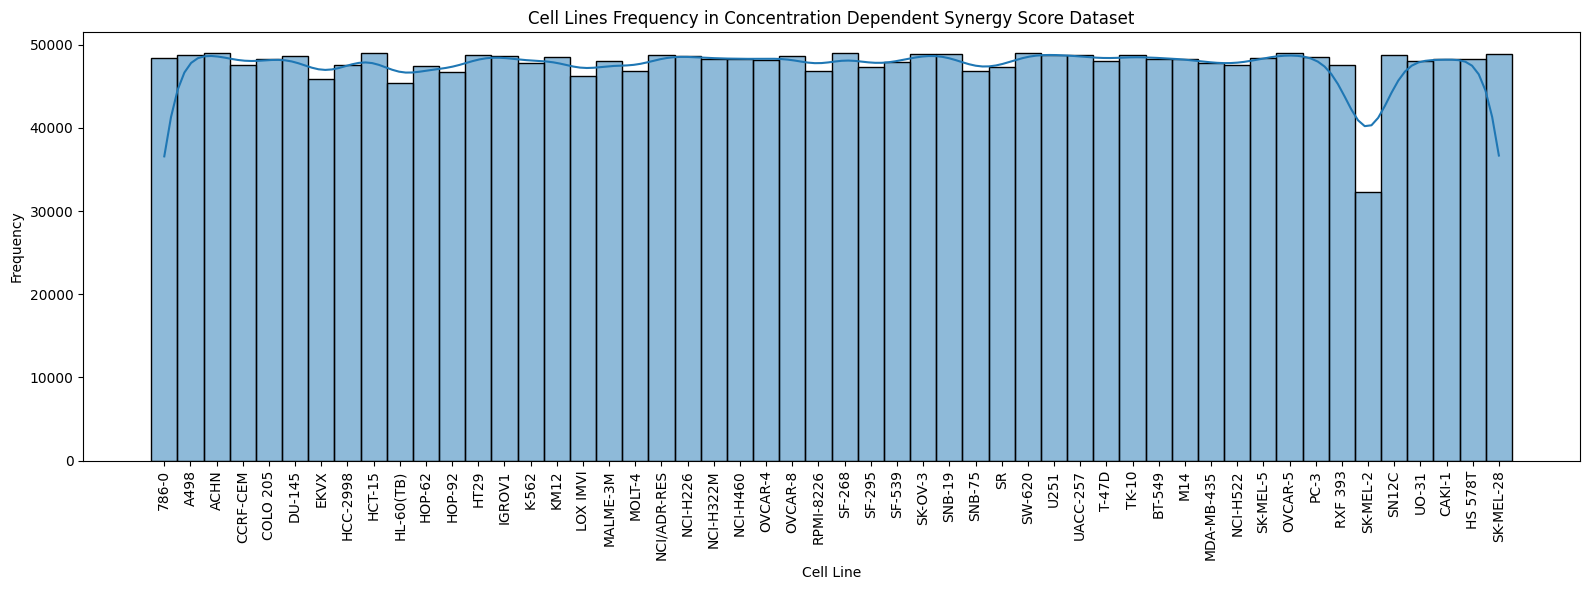

In [13]:
# Histogram of Cell Lines frequency in the filtered_almcomb_combo_df
plt.figure(figsize=(16, 6))
sns.histplot(filtered_almcomb_pg_df['CELLNAME'], bins=30, kde=True)
plt.title('Cell Lines Frequency in Concentration Dependent Synergy Score Dataset')
plt.xlabel('Cell Line')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('figures/supplemental_cell_line_histogram_conc.png')

# Print the mean, median, and standard deviation of the frequency of cell lines
cell_line_counts = filtered_almcomb_pg_df['CELLNAME'].value_counts()
mean_count = cell_line_counts.mean()
median_count = cell_line_counts.median()
std_count = cell_line_counts.std()
print(f'Mean count of cell lines: {mean_count}')
print(f'Median count of cell lines: {median_count}')
print(f'Standard deviation of cell lines: {std_count}')
# Print the top 5 cell lines with the highest frequency
print('Top 5 cell lines with the highest frequency:')
print(cell_line_counts.head(5))
# Print the top 5 cell lines with the lowest frequency
print('Top 5 cell lines with the lowest frequency:')
print(cell_line_counts.tail(5))

Mapping of drug names to NSC IDs:
  vemurafenib: Multiple NSC IDs [761431, 753082]

Counts for drugs with multiple NSC IDs:
  vemurafenib - NSC 761431: 517 occurrences
  vemurafenib - NSC 753082: 6077 occurrences
  TOTAL for vemurafenib: 6594 occurrences

Mean count of drugs: 5181.923076923077
Median count of drugs: 5174.5
Standard deviation of drugs: 576.7041221552254
Top 5 drugs with the highest frequency:
                    Drug_Name  Count
97                 crizotinib   6599
100               vemurafenib   6594
85   raloxifene hydrochloride   5787
92                anastrozole   5664
99                 vandetanib   5639
Top 5 drugs with the lowest frequency:
                         Drug_Name  Count
101              eribulin mesylate     97
10             triethylenemelamine   4523
64                      bortezomib   4649
41       doxorubicin hydrochloride   4661
68   estramustine phosphate sodium   4785


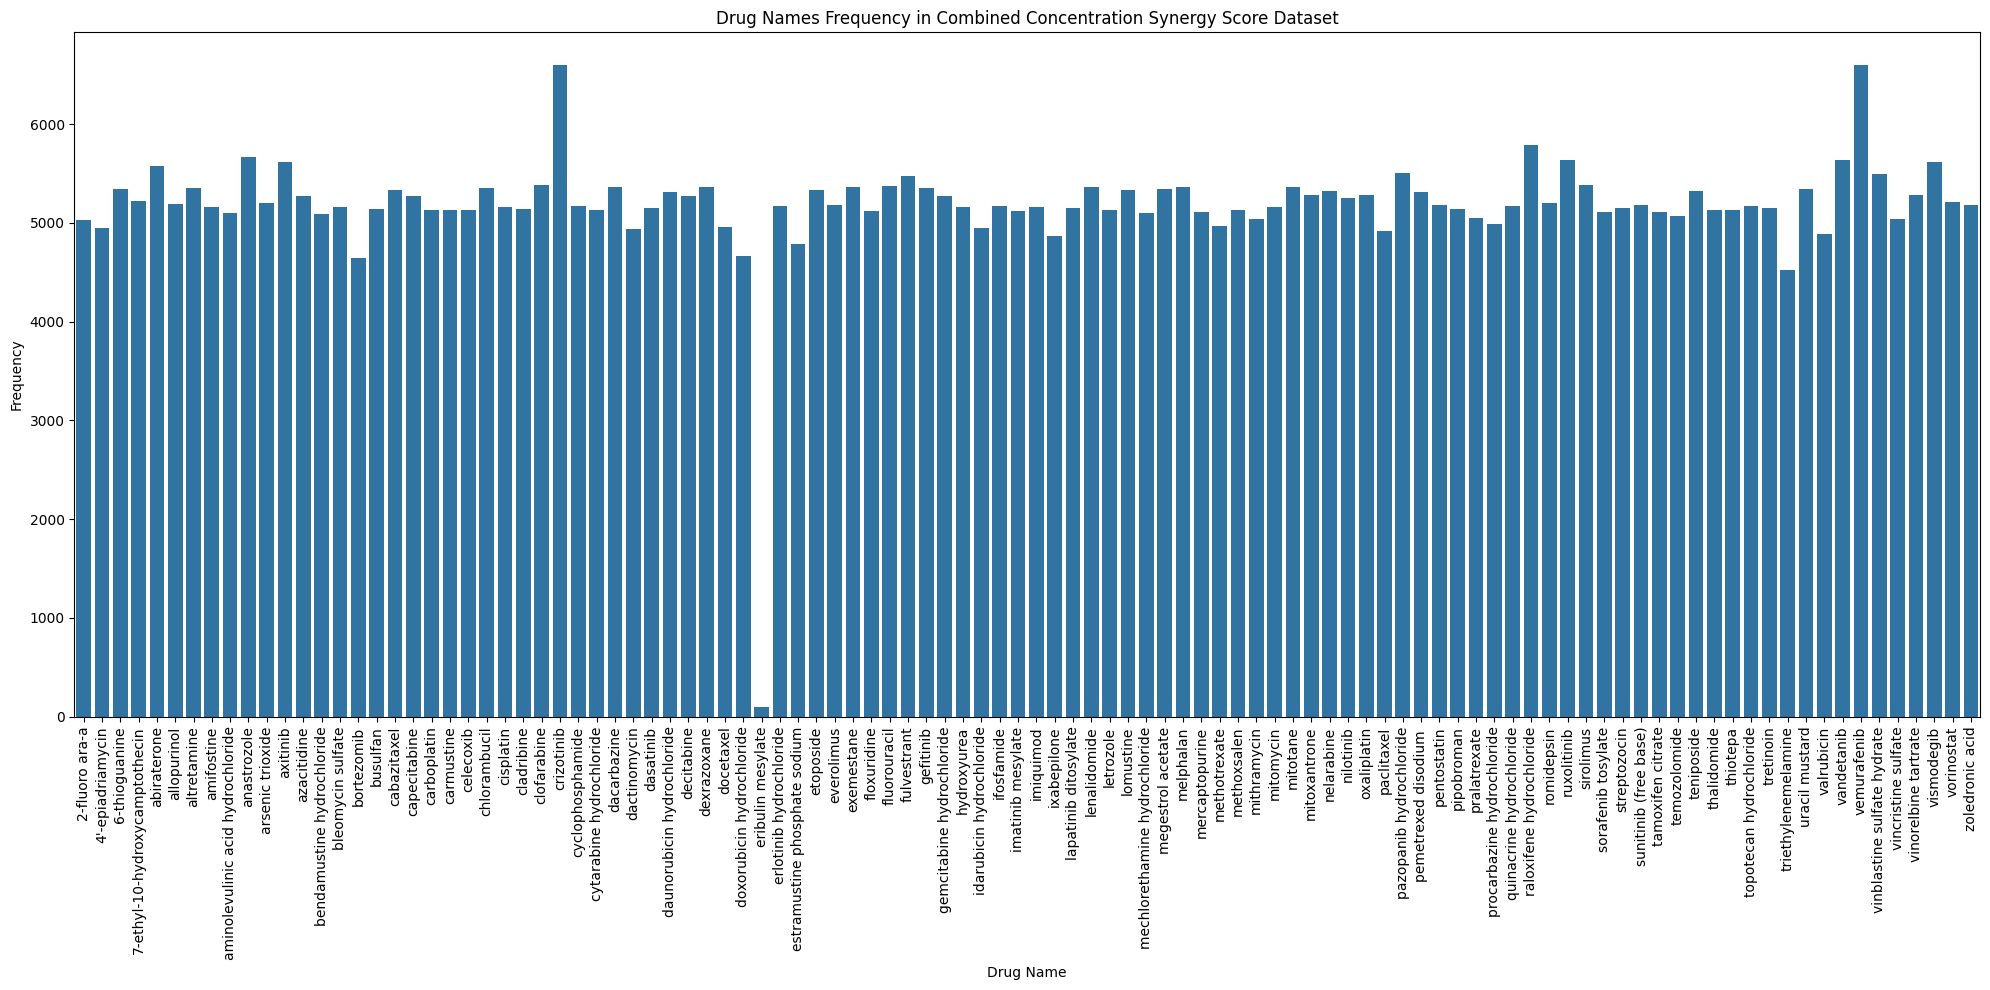

In [14]:
# For each unique drug in the filtered_almcomb_combo_df, add the number of times it appears in the dataset
unique_drugs_merged = set(filtered_almcomb_combo_df['NSC1']).union(set(filtered_almcomb_combo_df['NSC2']))
nsc_to_drug_name = {}
with open('data/NCI-ALMANAC/ComboCompoundNames_small.txt') as f:
    for line in f:
        entries = line.split('\t')
        nsc_to_drug_name[int(entries[0])] = entries[1].strip('\n').lower()

# Check if multiple NSC IDs map to the same drug name
drug_name_to_nscs = {}
for nsc, drug_name in nsc_to_drug_name.items():
    if drug_name in drug_name_to_nscs:
        drug_name_to_nscs[drug_name].append(nsc)
    else:
        drug_name_to_nscs[drug_name] = [nsc]

# Print all drug names and their associated NSC IDs
print("Mapping of drug names to NSC IDs:")
for drug_name, nscs in sorted(drug_name_to_nscs.items()):
    if len(nscs) > 1:
        print(f"  {drug_name}: Multiple NSC IDs {nscs}")

# Initialize counts for each drug
drug_name_to_counts = {drug_name: 0 for drug_name in drug_name_to_nscs.keys()}

# Count occurrences for each NSC ID and add to the corresponding drug name
for drug in unique_drugs_merged:
    drug_name = nsc_to_drug_name[drug]
    drug_count = len(filtered_almcomb_combo_df[(filtered_almcomb_combo_df['NSC1'] == drug) | (filtered_almcomb_combo_df['NSC2'] == drug)])
    drug_name_to_counts[drug_name] += drug_count

# Print counts for drugs with multiple NSC IDs
print("\nCounts for drugs with multiple NSC IDs:")
for drug_name, nscs in drug_name_to_nscs.items():
    if len(nscs) > 1:
        # Print individual NSC counts
        total_count = 0
        for nsc in nscs:
            nsc_count = len(filtered_almcomb_combo_df[(filtered_almcomb_combo_df['NSC1'] == nsc) | (filtered_almcomb_combo_df['NSC2'] == nsc)])
            print(f"  {drug_name} - NSC {nsc}: {nsc_count} occurrences")
            total_count += nsc_count
        # Print combined count
        print(f"  TOTAL for {drug_name}: {total_count} occurrences\n")

# Convert dictionary to DataFrame
drug_counts_df = pd.DataFrame({
    'Drug_Name': list(drug_name_to_counts.keys()),
    'Count': list(drug_name_to_counts.values())
})

# Sort alphabetically by drug name
drug_counts_df = drug_counts_df.sort_values('Drug_Name')

# Create the plot
plt.figure(figsize=(20, 10))
sns.barplot(x='Drug_Name', y='Count', data=drug_counts_df)
plt.title('Drug Names Frequency in Combined Concentration Synergy Score Dataset')
plt.xlabel('Drug Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('figures/supplemental_drug_histogram_combinedconc.png')

# Print the mean, median, and standard deviation of the frequency of drugs
mean_count = drug_counts_df['Count'].mean()
median_count = drug_counts_df['Count'].median()
std_count = drug_counts_df['Count'].std()
print(f'Mean count of drugs: {mean_count}')
print(f'Median count of drugs: {median_count}')
print(f'Standard deviation of drugs: {std_count}')
# Print the top 5 drugs with the highest frequency
print('Top 5 drugs with the highest frequency:')
print(drug_counts_df.sort_values('Count', ascending=False).head(5))
# Print the top 5 drugs with the lowest frequency
print('Top 5 drugs with the lowest frequency:')
print(drug_counts_df.sort_values('Count', ascending=True).head(5))

Mean count of drugs: 47772.92307692308
Median count of drugs: 47227.5
Standard deviation of drugs: 6366.387977300828
Top 5 drugs with the highest frequency:
                    Drug_Name  Count
90           4'-epiadriamycin  74205
89   idarubicin hydrochloride  74160
97                 crizotinib  59979
100               vemurafenib  59346
85   raloxifene hydrochloride  52671
Top 5 drugs with the lowest frequency:
                         Drug_Name  Count
101              eribulin mesylate   1455
10             triethylenemelamine  41271
41       doxorubicin hydrochloride  42537
64                      bortezomib  42687
68   estramustine phosphate sodium  43647


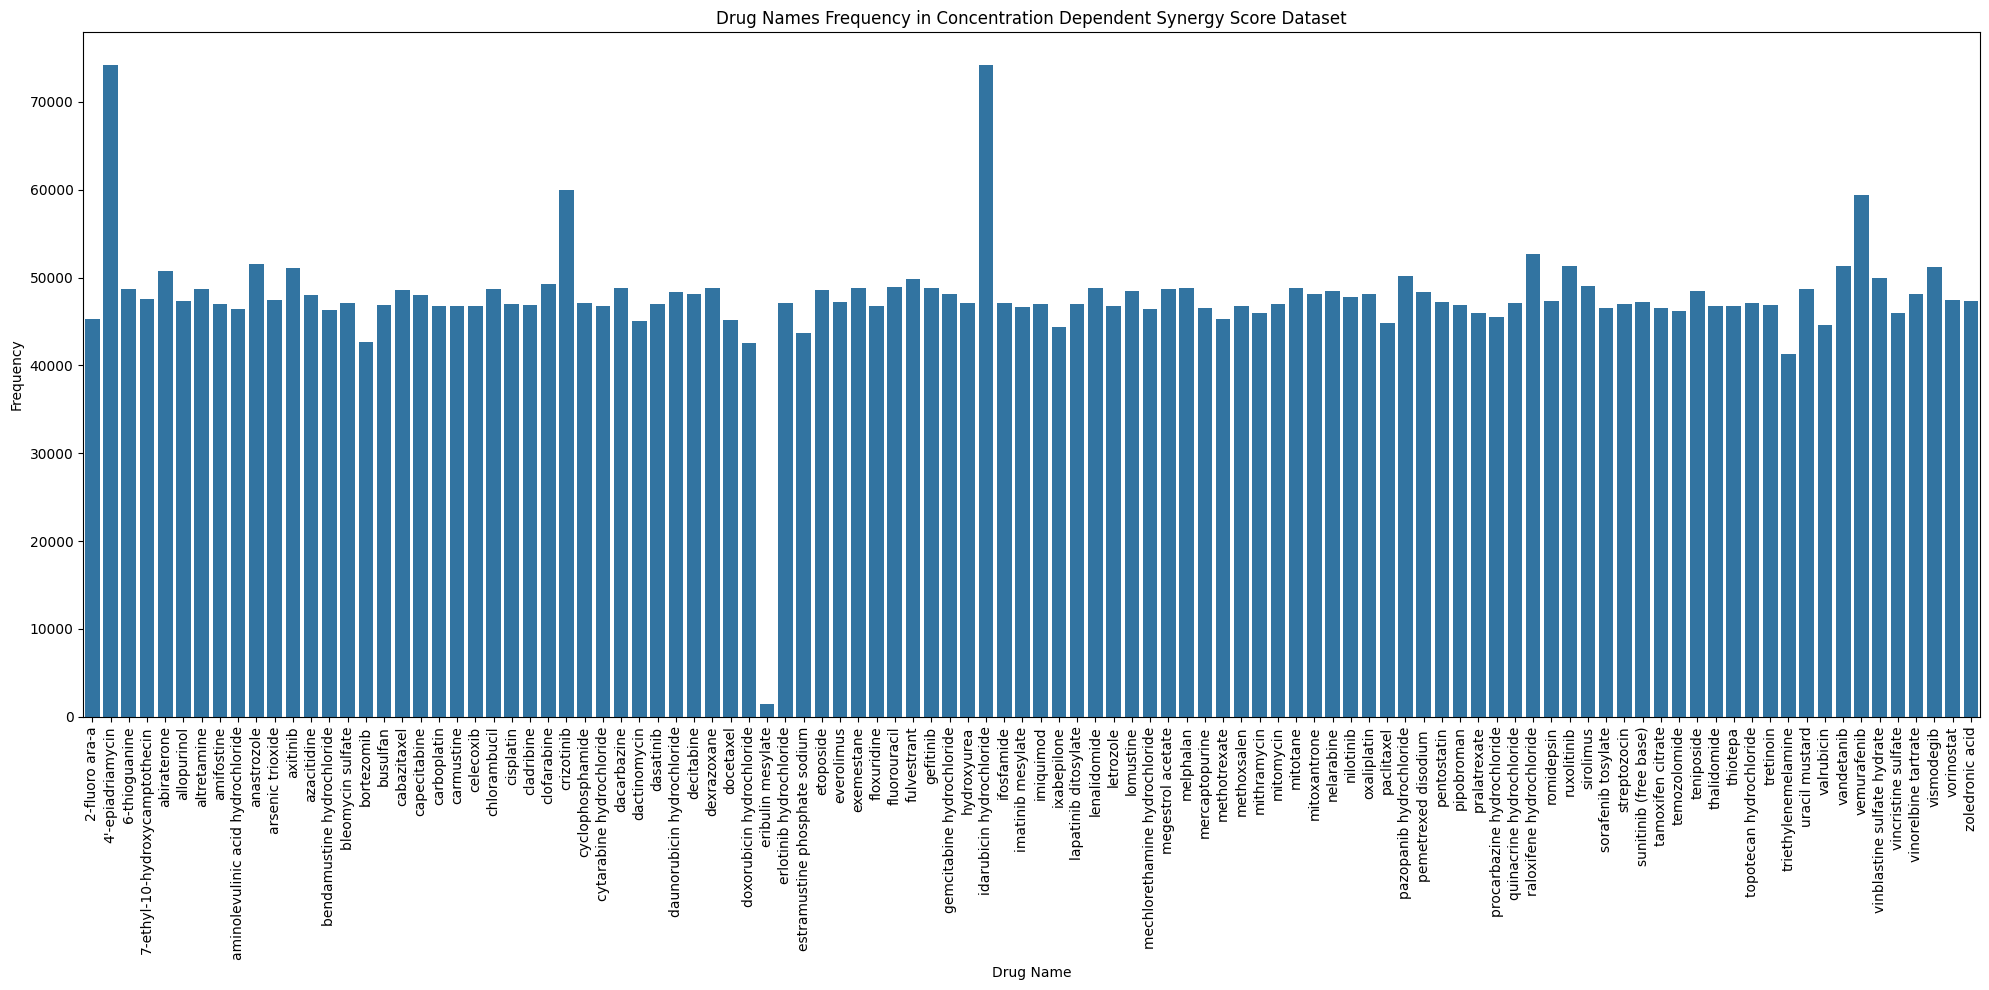

In [15]:
# For each unique drug in the filtered_almcomb_pg_df, add the number of times it appears in the dataset
unique_drugs_almanac = set(filtered_almcomb_pg_df['NSC1']).union(set(filtered_almcomb_pg_df['NSC2']))
# Initialize counts for each drug
drug_name_to_counts_almanac = {drug_name: 0 for drug_name in drug_name_to_nscs.keys()}
# Count occurrences for each NSC ID and add to the corresponding drug name
for drug in unique_drugs_almanac:
    drug_name = nsc_to_drug_name[drug]
    drug_count = len(filtered_almcomb_pg_df[(filtered_almcomb_pg_df['NSC1'] == drug) | (filtered_almcomb_pg_df['NSC2'] == drug)])
    drug_name_to_counts_almanac[drug_name] += drug_count
# Convert dictionary to DataFrame
drug_counts_df_almanac = pd.DataFrame({
    'Drug_Name': list(drug_name_to_counts_almanac.keys()),
    'Count': list(drug_name_to_counts_almanac.values())
})
# Sort alphabetically by drug name
drug_counts_df_almanac = drug_counts_df_almanac.sort_values('Drug_Name')
# Create the plot
plt.figure(figsize=(20, 10))
sns.barplot(x='Drug_Name', y='Count', data=drug_counts_df_almanac)
plt.title('Drug Names Frequency in Concentration Dependent Synergy Score Dataset')
plt.xlabel('Drug Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('figures/supplemental_drug_histogram_conc.png')
# Print the mean, median, and standard deviation of the frequency of drugs
mean_count = drug_counts_df_almanac['Count'].mean()
median_count = drug_counts_df_almanac['Count'].median()
std_count = drug_counts_df_almanac['Count'].std()
print(f'Mean count of drugs: {mean_count}')
print(f'Median count of drugs: {median_count}')
print(f'Standard deviation of drugs: {std_count}')
# Print the top 5 drugs with the highest frequency
print('Top 5 drugs with the highest frequency:')
print(drug_counts_df_almanac.sort_values('Count', ascending=False).head(5))
# Print the top 5 drugs with the lowest frequency
print('Top 5 drugs with the lowest frequency:')
print(drug_counts_df_almanac.sort_values('Count', ascending=True).head(5))
